In [1]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from PIL import Image
import cv2
import tensorflow as tf
from keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD
from keras.constraints import maxnorm
from sklearn.model_selection import train_test_split


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_x = np.load('/content/drive/MyDrive/batch1_train.npy') 
train_y = np.load('/content/drive/MyDrive/batch1_label.npy') 

In [4]:
np.shape(train_x)

(2600, 250, 250, 3)

In [5]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(train_y)
train_y_encoded = to_categorical(integer_encoded)
train_x_train ,train_x_test ,train_y_train ,train_y_test= train_test_split(train_x,train_y_encoded ,test_size= 0.3)

In [7]:
num_classes = 9
input_shape=(250,250, 3)

In [8]:
np.shape(train_x_train)

(1820, 250, 250, 3)

In [11]:
def residual_module(layer_in, n_filters):
    merge_input = layer_in
    if layer_in.shape[-1] != n_filters:
        merge_input = Conv2D(n_filters, (1,1), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)
    conv1 = Conv2D(n_filters, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)
    conv2 = Conv2D(n_filters, (3,3), padding='same', activation='linear', kernel_initializer='he_normal')(conv1)
    layer_out = layers.add([conv2, merge_input])
    layer_out = layers.Activation('relu')(layer_out)
    return layer_out
 
inp = layers.Input(shape=input_shape )
layer = residual_module(visible, 64)
fl = layers.Flatten()(layer)
dense3 = layers.Dense(num_classes, activation='softmax')(fl)
model = keras.Model(inputs=inp, outputs=dense3)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 250, 250, 3) 0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 250, 250, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 250, 250, 64) 36928       conv2d_4[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 250, 250, 64) 256         input_2[0][0]                    
_______________________________________________________________________________________

In [13]:
model.fit(train_x_train, train_y_train,validation_split=0.20, epochs=4)

Epoch 1/4
46/46 [==============================] - 80s 2s/step - loss: 0.6160 - accuracy: 0.8620 - val_loss: 1.9034 - val_accuracy: 0.3709
Epoch 2/4
46/46 [==============================] - 80s 2s/step - loss: 0.4296 - accuracy: 0.9141 - val_loss: 2.9228 - val_accuracy: 0.2830
Epoch 3/4
46/46 [==============================] - 79s 2s/step - loss: 0.3879 - accuracy: 0.9217 - val_loss: 2.1531 - val_accuracy: 0.3791
Epoch 4/4
46/46 [==============================] - 79s 2s/step - loss: 0.2434 - accuracy: 0.9650 - val_loss: 2.5686 - val_accuracy: 0.3407


In [14]:
train_x = np.load('/content/drive/MyDrive/batch2_train.npy') 
train_y = np.load('/content/drive/MyDrive/batch2_label.npy') 
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(train_y)
train_y_encoded = to_categorical(integer_encoded)
train_x_train ,train_x_test ,train_y_train ,train_y_test= train_test_split(train_x,train_y_encoded ,test_size= 0.3)

In [15]:
model.fit(train_x_train, train_y_train,validation_split=0.20, epochs=4)

Epoch 1/4
44/44 [==============================] - 77s 2s/step - loss: 2.0759 - accuracy: 0.3288 - val_loss: 1.6575 - val_accuracy: 0.4086
Epoch 2/4
44/44 [==============================] - 76s 2s/step - loss: 1.4272 - accuracy: 0.5125 - val_loss: 1.8470 - val_accuracy: 0.3486
Epoch 3/4
44/44 [==============================] - 76s 2s/step - loss: 1.0914 - accuracy: 0.6648 - val_loss: 1.8238 - val_accuracy: 0.4029
Epoch 4/4
44/44 [==============================] - 76s 2s/step - loss: 0.7706 - accuracy: 0.8006 - val_loss: 1.9624 - val_accuracy: 0.3857


In [17]:
train_x = np.load('/content/batch3/batch3_train.npy') 
train_y = np.load('/content/batch3/batch3_label.npy') 
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(train_y)
train_y_encoded = to_categorical(integer_encoded)
train_x_train ,train_x_test ,train_y_train ,train_y_test= train_test_split(train_x,train_y_encoded ,test_size= 0.3)
model.fit(train_x_train, train_y_train,validation_split=0.20, epochs=4)

Epoch 1/4
44/44 [==============================] - 77s 2s/step - loss: 1.8317 - accuracy: 0.3360 - val_loss: 1.6423 - val_accuracy: 0.4029
Epoch 2/4
44/44 [==============================] - 76s 2s/step - loss: 1.1867 - accuracy: 0.6083 - val_loss: 1.6538 - val_accuracy: 0.3971
Epoch 3/4
44/44 [==============================] - 75s 2s/step - loss: 0.7813 - accuracy: 0.7963 - val_loss: 1.8815 - val_accuracy: 0.3943
Epoch 4/4
44/44 [==============================] - 75s 2s/step - loss: 0.5390 - accuracy: 0.8863 - val_loss: 1.9706 - val_accuracy: 0.3914


In [19]:
train_x = np.load('/content/batch4/batch4_train.npy') 
train_y = np.load('/content/batch4/batch4_label.npy') 
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(train_y)
train_y_encoded = to_categorical(integer_encoded)
train_x_train ,train_x_test ,train_y_train ,train_y_test= train_test_split(train_x,train_y_encoded ,test_size= 0.3)
history = model.fit(train_x_train, train_y_train,validation_split=0.20, epochs=4)

Epoch 1/4
60/60 [==============================] - 107s 2s/step - loss: 1.7233 - accuracy: 0.3783 - val_loss: 1.6943 - val_accuracy: 0.3718
Epoch 2/4
60/60 [==============================] - 106s 2s/step - loss: 1.0017 - accuracy: 0.6863 - val_loss: 1.8729 - val_accuracy: 0.4013
Epoch 3/4
60/60 [==============================] - 107s 2s/step - loss: 0.6345 - accuracy: 0.8481 - val_loss: 1.8450 - val_accuracy: 0.3971
Epoch 4/4
60/60 [==============================] - 107s 2s/step - loss: 0.5175 - accuracy: 0.9028 - val_loss: 2.1404 - val_accuracy: 0.4034


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


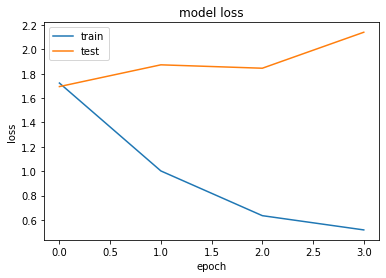

In [20]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

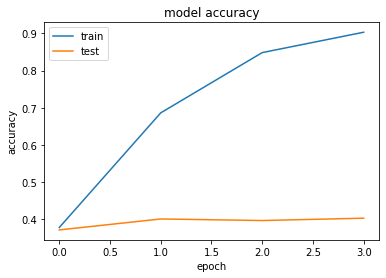

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
train_x = np.load('/content/batch5/batch5_train.npy') 
train_y = np.load('/content/batch5/batch5_label.npy') 
label_encoder = LabelEncoder()
y_l = label_encoder.fit_transform(train_y)
train_y_encoded = to_categorical(y_l)


In [26]:
import time
start_time = time.time()
loss, accuracy = model.evaluate(train_x, train_y_encoded, verbose=1)
end_time = time.time() - start_time

63/63 [==============================] - 16s 250ms/step - loss: 2.1781 - accuracy: 0.3840


In [27]:
print("total time: "+str(end_time))

total time: 17.023390769958496


In [28]:
loss

2.1781389713287354

In [29]:
accuracy

0.3840000033378601

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
print(classification_report(y_l, np.argmax(model.predict(train_x),axis=1)))

              precision    recall  f1-score   support

           0       0.26      0.16      0.20       164
           1       0.38      0.39      0.38       268
           2       0.53      0.34      0.42       187
           3       0.31      0.41      0.35       283
           4       0.09      0.04      0.05       157
           5       0.32      0.18      0.23       166
           6       0.88      0.97      0.92       212
           7       0.34      0.54      0.42       328
           8       0.17      0.15      0.16       235

    accuracy                           0.38      2000
   macro avg       0.37      0.35      0.35      2000
weighted avg       0.37      0.38      0.37      2000

